<h2>Import Libary</h2>

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

<h2>Import Dataset Minimum Wage of Bali Province</h2>

In [29]:
df = pd.read_excel('datasets/minimum_wage.xlsx')
df.head()

,regency,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Kab. Jembrana,309750.0,341000.0,432650.0,455300.0,532700,675000,737500,812500,875000,...,1000000,1212500,1542600,1662500,NaN,2006617,2181393,2356559,2557102,2557102
1,Kab. Tabanan,NaN,NaN,NaN,NaN,530000,622054,685000,777000,854500,...,1005000,1250000,1542600,1706700,1902970.0,2059965,2239500,2419332,2625217,2625217
2,Kab. Badung,345000.0,385000.0,469000.0,506500.0,582000,705000,805000,950000,1110000,...,1290000,1401000,1728000,1905000,2124075.0,2299311,2499581,2700297,2930093,2930093
3,Kab. Gianyar,320000.0,345000.0,446265.0,475000.0,540000,650000,760000,842500,925000,...,1104000,1230000,1543000,1707750,1904141.0,2061233,2240766,2421000,2627000,2627000
4,Kab. Klungkung,NaN,NaN,NaN,NaN,521000,625000,686000,767000,835800,...,995000,1190000,1545000,1650000,1839750.0,1991529,2164992,2338840,2538000,2538000


<h2>Check Column Null Value</h2>

In [30]:
df.isnull().sum()

regency    0
2002       5
2003       5
2004       5
2005       4
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       1
2017       0
2018       0
2019       0
2020       0
2021       0
dtype: int64

<h2>Cleaning Data</h2>
<p>there are 5 columns that have empty values, we will fill them with the average of each column whose values are empty</p>

In [31]:
df['2002'].fillna(value=df['2002'].mean(), inplace=True)
df['2003'].fillna(value=df['2003'].mean(), inplace=True)
df['2004'].fillna(value=df['2004'].mean(), inplace=True)
df['2005'].fillna(value=df['2005'].mean(), inplace=True)
df['2016'].fillna(value=df['2016'].mean(), inplace=True)
df.isna().sum()

regency    0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
2021       0
dtype: int64

<h2>Visualize Data</h2>

<AxesSubplot:>

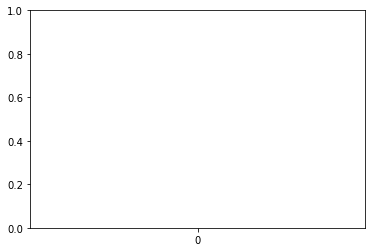

In [32]:
sns.boxplot()